# Normal Distibution

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from sklearn.metrics import mean_squared_error

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 12)

In [3]:
train_path = 'https://raw.githubusercontent.com/mirpulatov/CS_MSU/main/Course%20Work/data/tavg/train_1d.csv'
test_path = 'https://raw.githubusercontent.com/mirpulatov/CS_MSU/main/Course%20Work/data/tavg/test_1d.csv'
full_path = 'https://raw.githubusercontent.com/mirpulatov/CS_MSU/main/Course%20Work/data/tavg/full_1d.csv'
train_data = pd.read_csv(train_path, parse_dates = ['date'], index_col = ['date'], dayfirst = True)
test_data = pd.read_csv(test_path, parse_dates = ['date'], index_col = ['date'], dayfirst = True)
full_data = pd.read_csv(full_path, parse_dates = ['date'], index_col = ['date'], dayfirst = True)

In [4]:
res = train_data.groupby(by=[train_data.index.day, train_data.index.month]).mean()

In [5]:
year = res[res.index != (29, 2)].tavg.to_numpy()

In [6]:
leap_year = res.tavg.to_numpy()

In [7]:
train_data_2011 = train_data[train_data.index.year == 2011]
train_data_2012 = train_data[train_data.index.year == 2012]
train_data_2013 = train_data[train_data.index.year == 2013]
train_data_2014 = train_data[train_data.index.year == 2014]

In [ ]:
train_data_2011['noise'] = train_data_2011.tavg - year
train_data_2012['noise'] = train_data_2012.tavg - leap_year
train_data_2013['noise'] = train_data_2013.tavg - year
train_data_2014['noise'] = train_data_2014.tavg - year

train_data_2011['avg'] = year
train_data_2012['avg'] = leap_year
train_data_2013['avg'] = year
train_data_2014['avg'] = year

In [9]:
noise_data = train_data_2011.append(train_data_2012)
noise_data = noise_data.append(train_data_2013)
noise_data = noise_data.append(train_data_2014)

In [10]:
noise_data

,tavg,noise,avg
date,,,
2011-01-01,-3.369167,-1.872188,-1.496979
2011-01-02,-1.874167,12.462292,-14.336458
2011-01-03,-2.973333,2.664479,-5.637812
2011-01-04,-4.793750,-6.695521,1.901771
2011-01-05,-10.151250,-23.452500,13.301250
...,...,...,...
2014-12-27,-11.009583,-30.282500,19.272917
2014-12-28,-8.670417,-30.547083,21.876667
2014-12-29,-12.425000,-28.702604,16.277604


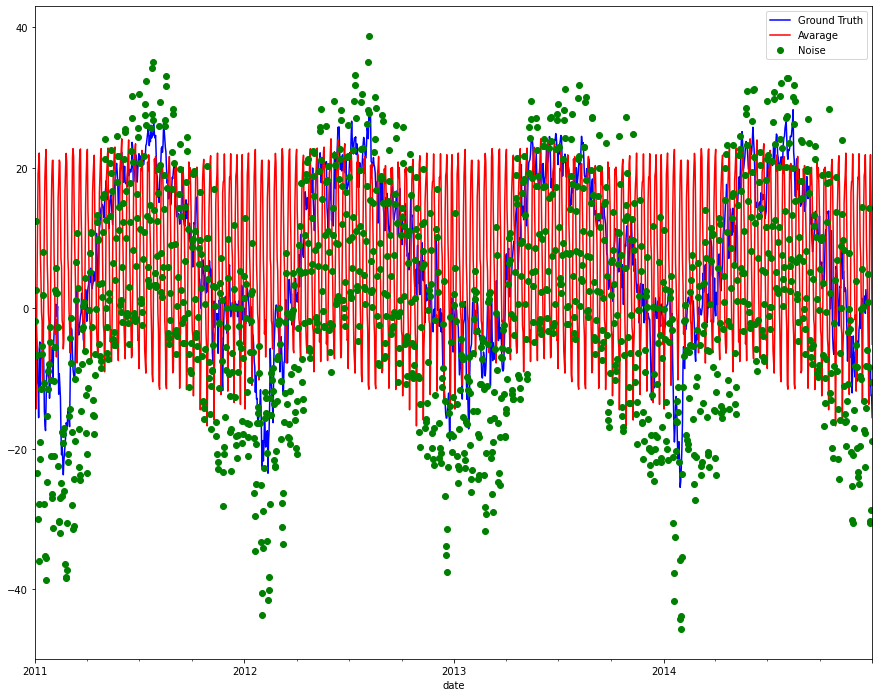

In [20]:
noise_data.tavg.plot(style=['b']);
noise_data.avg.plot(style=['r']);
noise_data.noise.plot(style=['go']);
plt.legend(["Ground Truth", "Avarage", "Noise"]);